# Diffusionsgleichung mit einer Neumann-Randbedingung
Aufgabe: Numerische Lösung der Diffusionsgleichung
$$u_t(t,x) = D u_{xx}(t,x)$$
auf einem Stab der Länge $L$ mit
- Anfangsbedingung: Peak auf Mitte des Stabes
- Linker Rand: $u(t, 0) = 0$
- Rechter Rand: $u_x(t, L) = 0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
L = 1
D = 1

N_X = 201 # Anzahl der Gitterpunkte

u_0 = np.zeros(N_X)
x = np.linspace(0, L, N_X)
u_0[N_X//2] = 1

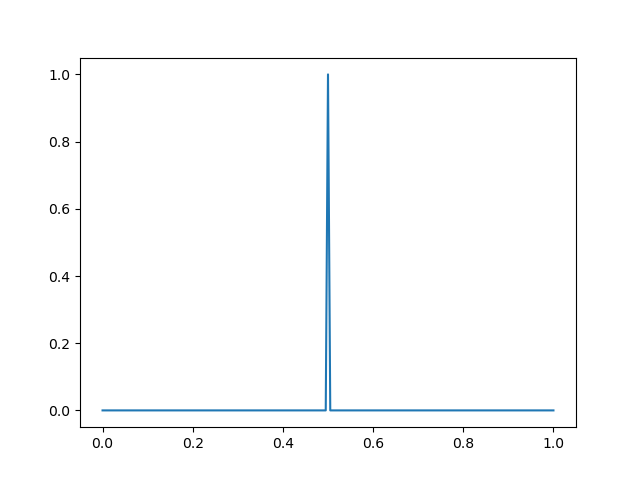

In [3]:
plt.figure()
plt.plot(x, u_0)
plt.show()

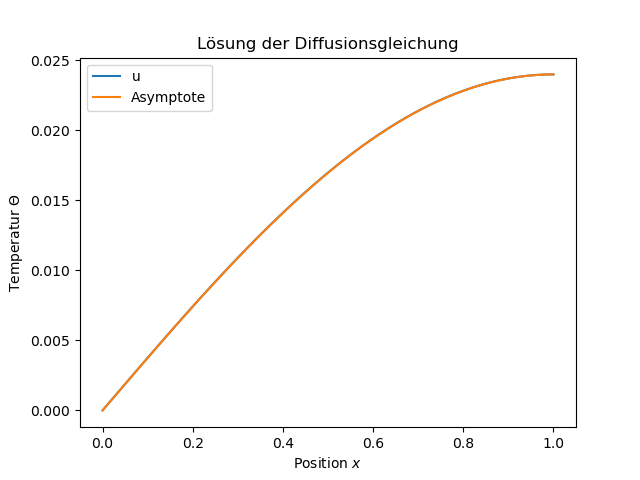

CPU times: user 2.95 s, sys: 12.4 ms, total: 2.96 s
Wall time: 2.97 s


In [10]:
%%time
T = 1.0e0
alpha = 0.31
N_X = 500
dx = L/(N_X-1)
dt = alpha*dx**2/D

u_0 = np.zeros(N_X)
u_0[N_X//2] = 100
# u_0[0] = 22  # mögliche andere Dirichlet-Randbedingung
# u_0[-1] = 42 # Das wäre eine andere Dirichlet-RB auf dem rechten Rand
x = np.linspace(0, L, N_X)
u = u_0.copy() # Alternativ in numpy: u = 1*u_0

t = 0
while t < T:
    u[1:-1] = (1 - 2*alpha)*u[1:-1] + alpha*(u[0:-2] + u[2:])
    # Diskretisierte rechte Randbedingung
    u[-1] = u[-2]
    #u[-1] = 22
    t += dt

A1 = np.max(u)

plt.figure()
plt.plot(x,u)
plt.plot(x, A1*np.sin(x*np.pi/(2*L)))
plt.title("Lösung der Diffusionsgleichung")
plt.legend(["u", "Asymptote"])
plt.xlabel("Position $x$")
plt.ylabel(r"Temperatur $\Theta$")
plt.show()